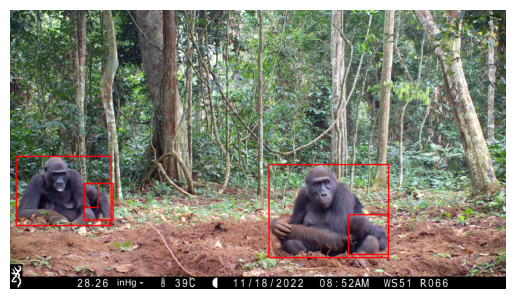

In [1]:
import os
import random
import cv2
import gorillatracker.utils.visualizer_helpers as visualizer_helpers
import gorillatracker.utils.cutout_helpers as cutout_helpers
import gorillatracker.scripts.cutout_integrity as cutout_integrity
from matplotlib import pyplot as plt

full_image_path = "/workspaces/gorillatracker/data/ground_truth/cxl/full_images"
cutout_path = "/workspaces/gorillatracker/data/derived_data/cxl/yolov8n_gorillabody_ybyh495y/body_bbox"

full_images = os.listdir(full_image_path)
cutouts = os.listdir(cutout_path)

cutout = random.choice(cutouts)
filename, _ = os.path.splitext(cutout)

visualizer_helpers.show_yolo_box(f"{full_image_path}/{filename}.png", f"{cutout_path}/{cutout}")

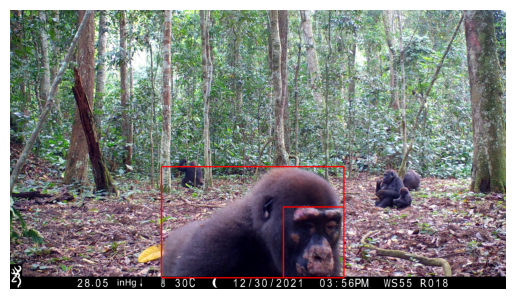

In [37]:
full_image_path = "/workspaces/gorillatracker/data/ground_truth/cxl/full_images"
image_dir = "/workspaces/gorillatracker/data/derived_data/cxl/yolov8n_gorillabody_ybyh495y/body_images"
cutout_dir = "/workspaces/gorillatracker/data/ground_truth/cxl/face_images"
image = random.choice(os.listdir(image_dir))
full_image_path = os.path.join(full_image_path, image)
face_image_path = os.path.join(cutout_dir, image)
body_image_path = os.path.join(image_dir, image)

full_image = cv2.imread(full_image_path)
face_image = cv2.imread(face_image_path)
body_image = cv2.imread(body_image_path)

face_bbox = cutout_helpers.get_cutout_bbox(full_image, face_image)
body_bbox = cutout_helpers.get_cutout_bbox(full_image, body_image)

visualizer_helpers.draw_bbox(full_image, face_bbox)
visualizer_helpers.draw_bbox(full_image, body_bbox)
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
plt.imshow(full_image)
plt.axis("off")
plt.show()